In [3]:
import pandas as pd
from scipy.interpolate import lagrange

inputfile='./data/missing_data.xls'
outputfile='./missing_data_processed.xls'

data=pd.read_excel(inputfile,header=None)

def ployinterp_column(s,n,k=5):
    y = s.reindex(list(range(n-k, n)) + list(range(n+1, n+1+k)))
    y=y[y.notnull()]
    return lagrange(y.index,list(y))(n)

for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]:
            data[i][j]=ployinterp_column(data[i],j)

data.to_excel(outputfile,header=None,index=False)

/var/folders/x6/g_vzqtmd3qv8911q4dpjqbh40000gn/T/ipykernel_2863/3289802632.py:19: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel(outputfile,header=None,index=False)


In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def cm_plot(y,yp):
    cm=confusion_matrix(y,yp)
    plt.matshow(cm,cmap=plt.cm.Greens)
    plt.colorbar()
    
    for x in range(len(cm)):
        for y in range(len(cm)):
            plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

In [2]:
import pandas as pd
from random import shuffle

datafile='./data/model.xls'
data=pd.read_excel(datafile)
data=data.values
shuffle(data)

p=0.8
train=data[:int(len(data)*p),:]
test=data[int(len(data)*p):,:]

In [15]:
# from keras.models import Sequential
# from keras.layers.core import Dense,Activation
# from keras.activations import *


# netfile='./data/net.model'
# net=Sequential()
# net.add(Dense(3,10))
# net.add(Activation('relu'))
# net.add(Dense(10))
# net.add(Activation('sigmoid'))
# # net.compile(loss='binary_crossentropy',optimizer='adam',class_mode="binary")
# net.compile(loss='binary_crossentropy',optimizer='adam')

# net.fit(train[:,:3],train[:,3],batch_size=1)
# net.save_weights(netfile)

# predict_result=net.predict_classes(train[:,:3]).reshape(len(train))

# from cm_plot import *
# cm_plot(train[:,3],predict_result).show()

TypeError: Could not interpret activation function identifier: 10

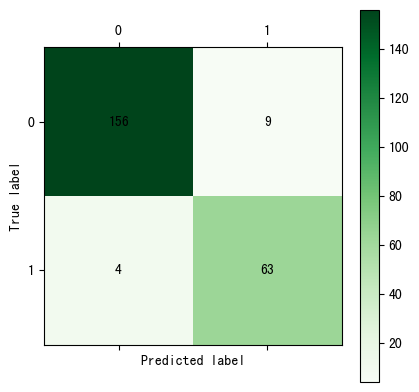

In [17]:
from sklearn.tree import DecisionTreeClassifier

treefile='./tree.pkl'
tree=DecisionTreeClassifier()
tree.fit(train[:,:3],train[:,3])

import joblib
joblib.dump(tree,treefile)

cm_plot(train[:,3],tree.predict(train[:,:3])).show()

In [19]:
from sklearn.metrics import roc_curve

predict_result=net.predict(test[:,:3]).reshape(len(test))
fpr,tpr,thresholds=roc_curve(test[:,3],predict_result,pos_label=1)
plt.plot(fpr,tpr,linewidth=2,label='ROC of LM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0,1.05)
plt.xlim(0,1.05)
plt.legend(loc=4)
plt.show()

2/2 [==============================] - 0s 2ms/step


ValueError: cannot reshape array of size 177 into shape (59,)

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

lr_model =LogitsticRegression()

lr_model.fit(X.train,y_train)
y.pred=lr_model.predict(X_test)

accuracy=lr_model.predict(y_test,y_pred)
print('Logistic:',accuracy)

NameError: name 'X' is not defined